In [7]:
import numpy as np


side = 1000
heights = np.zeros((side, side))
points = [(a,b) for a in range(side) for b in range(side)]
shift = side/10

def distance(pointA, pointB):
    dx = min(abs(pointA[0] - pointB[0]), side - abs(pointA[0] - pointB[0]))
    dy = min(abs(pointA[1] - pointB[1]), side - abs(pointA[1] - pointB[1]))
    return (dx**2 + dy**2)**0.5

def genPlates(n = 10):
    centroids = np.round(np.random.rand(n, 2)*side)
    ids = np.array([np.argmin([distance(point, centroid) for centroid in centroids]) for point in points]).reshape(side,side)
    return ids, centroids

num_plates = 10
ids, centroids = genPlates(num_plates)
typ = np.random.randint(2, size=num_plates)


def genShifts(n = 10):
    shifts = np.round(np.random.rand(n, 2)*shift)
    return shifts

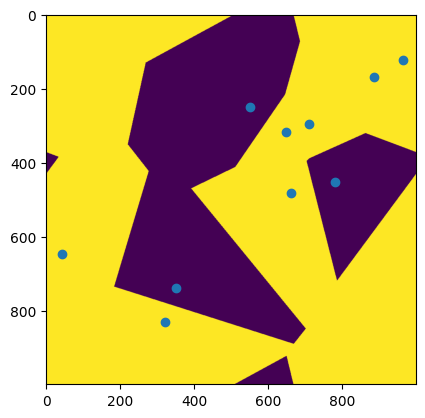

In [8]:

for point in points:
    if typ[ids[point[0], point[1]]] == 0:
        heights[point[0], point[1]] = 1
    else:
        heights[point[0], point[1]] = 2



import matplotlib.pyplot as plt
plt.imshow(heights, cmap='viridis')  
plt.scatter(centroids.T[1], centroids.T[0])
plt.show()


In [ ]:
shifts = genShifts(num_plates)
new_heights = np.zeros((side, side))

for point in points:
    shift = shifts[ids[point]]
    new_point = (int(point[0]+shift[0])%side, int(point[1]+shift[1])%side)
    new_heights[new_point[0], new_point[1]] += heights[point[0], point[1]]

for i, shift in enumerate(shifts):
    centroids[i][0] += shift[0]
    centroids[i][1] += shift[1]

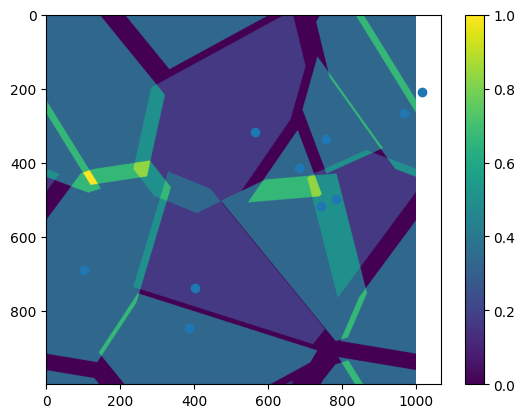

In [10]:
plt.imshow(new_heights, cmap='viridis')  
plt.scatter(centroids.T[1], centroids.T[0])
plt.colorbar()
plt.show()

In [ ]:
def smooth(hegiths, window=side/10):
    for point in points:
        curvature = new_heights[(points[0]-1)%side, (points[0])%side]+new_heights[(points[0]+1)%side, (points[0])%side] -2*new_heights[(points[0])%side, (points[0])%side]
        curvature += new_heights[(points[0])%side, (points[0]-1)%side]+new_heights[(points[0])%side, (points[0]+1)%side] -2*new_heights[(points[0])%side, (points[0])%side]
    plt.imshow(heights, cmap='viridis')  
plt.scatter(centroids.T[1], centroids.T[0])
plt.show()
    return _